# Loading packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

# Loading Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.drop([517471], axis = 0, inplace= True)

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,-1.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,12.0,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3.0,1.0,10.0,1.0,10.0,1.0,5.0,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,-1.0,0.0,-1.0,11.0,1.0,1.0,2.0,1.0,19.0,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2.0,1.0,9.0,5.0,8.0,1.0,7.0,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7.0,1.0,-1.0,0.0,-1.0,14.0,1.0,1.0,2.0,1.0,60.0,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2.0,2.0,9.0,1.0,8.0,2.0,7.0,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0.0,1.0,11.0,1.0,1.0,3.0,1.0,104.0,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2.0,4.0,7.0,1.0,8.0,4.0,2.0,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,-1.0,0.0,-1.0,14.0,1.0,1.0,2.0,1.0,82.0,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2.0,2.0,6.0,3.0,10.0,2.0,12.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


- Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).
- Feature name include the postfix bin to indicate binary features and cat to indicate categorical features
- Features without these sesignations are either continuous and ordinal.
- Values of -1 indicate that the feature was missing from the observation
- The target columns signifies whether or not a claim was filed for that policy holder.

Ok, that's important information to get us started. Let's have a quick look at the first and last rows to confirm all of this.

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,-1.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,12.0,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3.0,1.0,10.0,1.0,10.0,1.0,5.0,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,-1.0,0.0,-1.0,11.0,1.0,1.0,2.0,1.0,19.0,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2.0,1.0,9.0,5.0,8.0,1.0,7.0,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7.0,1.0,-1.0,0.0,-1.0,14.0,1.0,1.0,2.0,1.0,60.0,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2.0,2.0,9.0,1.0,8.0,2.0,7.0,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0.0,1.0,11.0,1.0,1.0,3.0,1.0,104.0,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2.0,4.0,7.0,1.0,8.0,4.0,2.0,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,-1.0,0.0,-1.0,14.0,1.0,1.0,2.0,1.0,82.0,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2.0,2.0,6.0,3.0,10.0,2.0,12.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
print('ps_ind_01 Values >>>\n', train.ps_ind_01.value_counts())

ps_ind_01 Values >>>
 0    163097
1    125317
2     71520
5     53418
3     44536
4     29150
6     15330
7     15103
Name: ps_ind_01, dtype: int64


In [6]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
517466,1293032,0,4,1,8,0,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.9,0.2,0.633936,11.0,1.0,-1.0,0.0,-1.0,11.0,1.0,1.0,0.0,1.0,57.0,2.0,0.374166,0.706361,0.392428,3.000000,0.1,0.4,0.0,3.0,1.0,8.0,1.0,10.0,3.0,10.0,0.0,1.0,3.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0
517467,1293042,0,2,1,7,0,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.9,1.2,1.180572,11.0,0.0,1.0,8.0,1.0,13.0,-1.0,1.0,2.0,1.0,104.0,3.0,0.565685,1.708904,0.457712,3.605551,0.8,0.4,0.1,3.0,2.0,6.0,4.0,7.0,1.0,7.0,6.0,1.0,4.0,6.0,0.0,1.0,1.0,1.0,0.0,0.0
517468,1293043,0,2,1,2,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,0.4,0.908983,11.0,1.0,-1.0,0.0,-1.0,7.0,1.0,1.0,2.0,1.0,92.0,3.0,0.374166,0.777485,0.392683,3.464102,0.3,0.8,0.9,4.0,2.0,8.0,2.0,10.0,3.0,12.0,5.0,1.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,1.0
517469,1293046,0,1,1,11,0,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.8,0.5,0.826892,6.0,1.0,-1.0,0.0,0.0,11.0,0.0,1.0,0.0,1.0,99.0,2.0,0.316228,0.605706,0.368782,2.828427,0.6,0.4,0.9,2.0,3.0,10.0,1.0,9.0,4.0,7.0,8.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
517470,1293049,0,0,1,5,1,0,1,0,0,0,0,0,0,0,0,10,0,0,0,0.9,0.4,0.832917,11.0,1.0,-1.0,0.0,-1.0,11.0,1.0,1.0,0.0,1.0,103.0,1.0,0.316228,0.579452,0.358329,2.828427,0.2,0.5,0.2,0.0,1.0,9.0,1.0,11.0,1.0,5.0,7.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0


We indeed see the following
- binary variables
- categorical variables of which the category values are integers
- variables with -1 represnting missing values
- the target variable and and ID variable

In [7]:
train.shape

(517471, 59)

In [8]:
train.drop_duplicates()   ## duplicate 없음!!
train.shape

(517471, 59)

We have 49 variavbles and 517472 rows. Let's see if we have the same number of variables in the test data. <br>
Let's see if there are duplicate rows in the training data.


In [9]:
test.shape

(610679, 58)

We are missing one variable in the test set, but this is the target variable. So that's fine.<br>
Let's now insvestigate how many variables of each type we have

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517471 entries, 0 to 517470
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              517471 non-null  int64  
 1   target          517471 non-null  int64  
 2   ps_ind_01       517471 non-null  int64  
 3   ps_ind_02_cat   517471 non-null  int64  
 4   ps_ind_03       517471 non-null  int64  
 5   ps_ind_04_cat   517471 non-null  int64  
 6   ps_ind_05_cat   517471 non-null  int64  
 7   ps_ind_06_bin   517471 non-null  int64  
 8   ps_ind_07_bin   517471 non-null  int64  
 9   ps_ind_08_bin   517471 non-null  int64  
 10  ps_ind_09_bin   517471 non-null  int64  
 11  ps_ind_10_bin   517471 non-null  int64  
 12  ps_ind_11_bin   517471 non-null  int64  
 13  ps_ind_12_bin   517471 non-null  int64  
 14  ps_ind_13_bin   517471 non-null  int64  
 15  ps_ind_14       517471 non-null  int64  
 16  ps_ind_15       517471 non-null  int64  
 17  ps_ind_16_

In [11]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [12]:
calc_ftoi = train.loc[:,  ['ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08','ps_calc_09', 
                           'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']]

In [13]:
calc_ftoi = calc_ftoi.applymap(lambda x : int(x))

In [14]:
train.drop(['ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08','ps_calc_09', 
                           'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'], axis = 1, inplace = True)

In [15]:
train = pd.concat([train, calc_ftoi], axis = 1)

# Metadata
- To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we wand to select specific variables for analysis, visualization, modeling ...
<br>
<br>
Concretely we will store:
- role : input, ID, target
- level : nomial, interval, ordinal, binary
- keep : True, False
- dtype : int, float, str

In [16]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
        print('binary==>', f)
    elif 'cat' in f or f == 'id':
        level = 'nominal'
        print('nomial==>', f)
    elif train[f].dtype == 'int':
        level = 'ordinal'
        print('ordinal==>', f)
    elif train[f].dtype == float:
        level = 'interval'
        print('interval==>', f)
    else:
        level = 'ordinal'

        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

nomial==> id
binary==> target
nomial==> ps_ind_02_cat
nomial==> ps_ind_04_cat
nomial==> ps_ind_05_cat
binary==> ps_ind_06_bin
binary==> ps_ind_07_bin
binary==> ps_ind_08_bin
binary==> ps_ind_09_bin
binary==> ps_ind_10_bin
binary==> ps_ind_11_bin
binary==> ps_ind_12_bin
binary==> ps_ind_13_bin
binary==> ps_ind_16_bin
binary==> ps_ind_17_bin
binary==> ps_ind_18_bin
interval==> ps_reg_01
interval==> ps_reg_02
interval==> ps_reg_03
nomial==> ps_car_01_cat
nomial==> ps_car_02_cat
nomial==> ps_car_03_cat
nomial==> ps_car_04_cat
nomial==> ps_car_05_cat
nomial==> ps_car_06_cat
nomial==> ps_car_07_cat
nomial==> ps_car_08_cat
nomial==> ps_car_09_cat
nomial==> ps_car_10_cat
nomial==> ps_car_11_cat
interval==> ps_car_11
interval==> ps_car_12
interval==> ps_car_13
interval==> ps_car_14
interval==> ps_car_15
interval==> ps_calc_01
interval==> ps_calc_02
interval==> ps_calc_03
binary==> ps_calc_15_bin
binary==> ps_calc_16_bin
binary==> ps_calc_17_bin
binary==> ps_calc_18_bin
binary==> ps_calc_19_bin


In [17]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


- Example to extract all nomial variabels that are not dropped

In [18]:
meta[(meta.level == 'nominal') & (meta.keep)].index


Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [19]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].count()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,11
3,input,nominal,14
4,input,ordinal,15
5,target,binary,1


# Descriptive statistics

We can also apply the describe method on the dataframe. However,it dosen't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually later.
<br><br>
Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To Keep things clear. we'll do this per data type.

In [20]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000
mean,0.611120,0.439895,0.551844,2.345540,0.379925,0.813127,0.276383,3.065315,0.449971,0.449539,0.449829
std,0.287754,0.404821,0.793781,0.832746,0.058323,0.224407,0.356930,0.732645,0.287162,0.286856,0.287231
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,2.000000,0.316228,0.670882,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.721110,3.000000,0.374166,0.765825,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.001873,3.000000,0.400000,0.906132,0.396863,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### reg variable
- only ps_reg_03 has missing values  ( -1 == missing value )
- the range(min to max) differs between the variables. We could apply scaling (e.g. StandardScaler)<br>
  but it depends on the classifier we will want to use
  
### car variable
- ps_car_12 and ps_car_15 have missing values
- again, the range differs and we could apply scaling

### calc variable
- no missing values
- this seems to be some kind of ratio as the maximum is 0.9
- all three _calc variables have very similar distribution

Overall, We can see that the range of the interval variables is rather smalll. Perhaps some transformation (e.g. log) is already applied in order to anonymize the data?

# Ordinal variables


In [21]:
v = meta[(meta.level =='ordinal') & (meta.keep)].index

train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000
mean,1.900311,4.424631,0.012528,7.301412,2.370544,1.886649,7.688686,3.005828,9.224886,2.338720,8.431692,5.439996,1.442320,2.872252,7.538457
std,1.984205,2.702362,0.128328,3.546184,1.117088,1.134845,1.334782,1.414180,1.459583,1.246303,2.905717,2.331466,1.203425,1.694192,2.746402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- We could apply scaling to deal with the different ranges

# Binary variables

In [22]:
v = meta[(meta.level == 'binary') & (meta.keep)].index

train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.00000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000,517471.000000
mean,0.036414,0.393895,0.256671,0.163951,0.185483,0.000394,0.001720,0.009444,0.000970,0.661113,0.12089,0.153413,0.122451,0.627658,0.554031,0.287525,0.348941,0.153340
std,0.187317,0.488612,0.436797,0.370232,0.388689,0.019851,0.041436,0.096720,0.031131,0.473332,0.32600,0.360386,0.327807,0.483429,0.497073,0.452609,0.476636,0.360315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A priori in the train data is 3.645%, which is strongly imbalanced
- From the means we can conclude that for most variables the value is zero in most cases

In [23]:
train['target'].value_counts()

0    498628
1     18843
Name: target, dtype: int64

# Handing imbalanced classes

As we mentioned abovve the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any dadded value in practice. Two possible strategies to deal with this problem are:
<br>
- oversampling records with target = 1
- undersampling records with target = 0
<br>

There are many more strategies of course and MachineLearningMastery.com gives a nive overview. As we have a rather large training set, We can go for undersampling.

In [24]:
desired_apriori=0.10

# Get the indices per target value

idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0

undersampling_rate = (( 1- desired_apriori)*nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling : {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop =True)

Rate to undersample records with target=0: 0.3401072543058152
Number of records with target=0 after undersampling : 169587


In [25]:
train.shape

(188430, 59)

# Data Quality Checks

In [26]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 81 records (0.04%) with missing values
Variable ps_ind_04_cat has 34 records (0.02%) with missing values
Variable ps_ind_05_cat has 2009 records (1.07%) with missing values
Variable ps_reg_03 has 33828 records (17.95%) with missing values
Variable ps_car_01_cat has 44 records (0.02%) with missing values
Variable ps_car_02_cat has 1 records (0.00%) with missing values
Variable ps_car_03_cat has 129081 records (68.50%) with missing values
Variable ps_car_05_cat has 83416 records (44.27%) with missing values
Variable ps_car_07_cat has 3918 records (2.08%) with missing values
Variable ps_car_09_cat has 189 records (0.10%) with missing values
Variable ps_car_11 has 2 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 13669 records (7.25%) with missing values
In total, there are 13 variables with missing values


In [27]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14'],


In [28]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

**checking the cardinality of the categorical variables** 

cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.


In [29]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


Only **ps_car_11_cat** has many distinct values, although it is still reasonable.


In [30]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [31]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## Exploratory Data Visualization

### Categorical variables 
Let's look into the categorical variables and the proportion of customers with target=1

In [32]:
v= meta[(meta.level == 'nominal') & (meta.keep)].index



<Figure size 432x288 with 0 Axes>

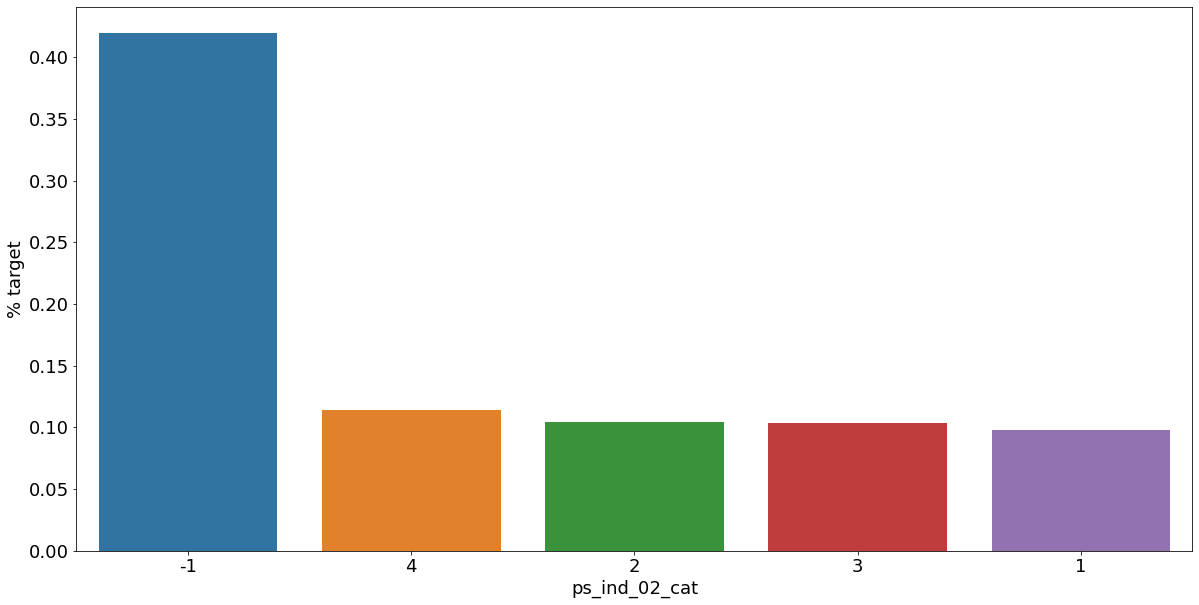

<Figure size 432x288 with 0 Axes>

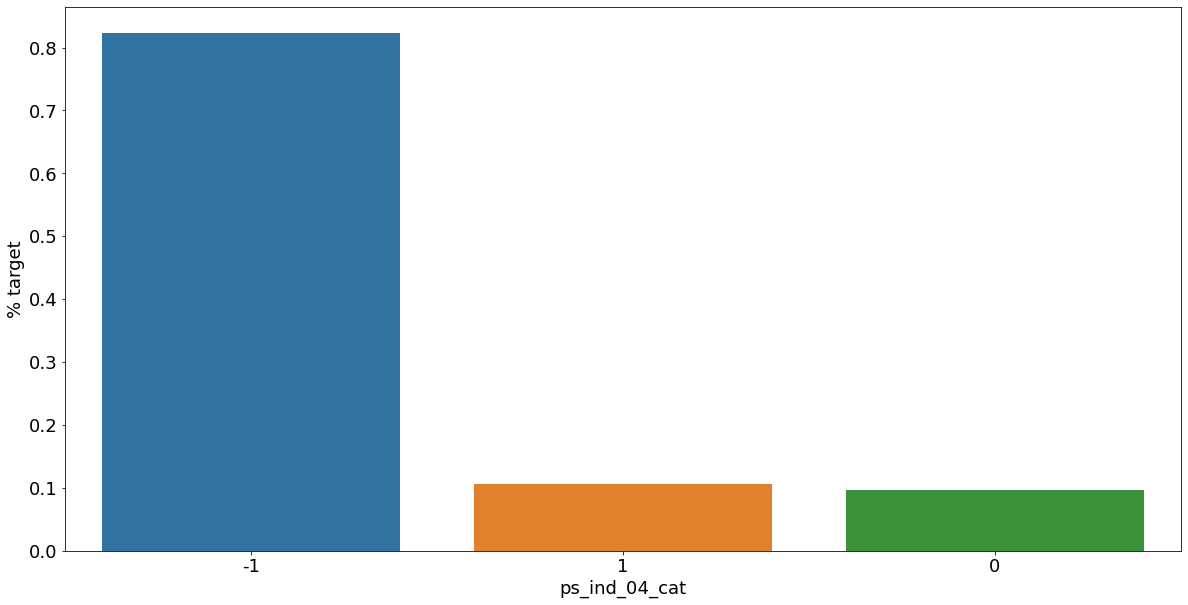

<Figure size 432x288 with 0 Axes>

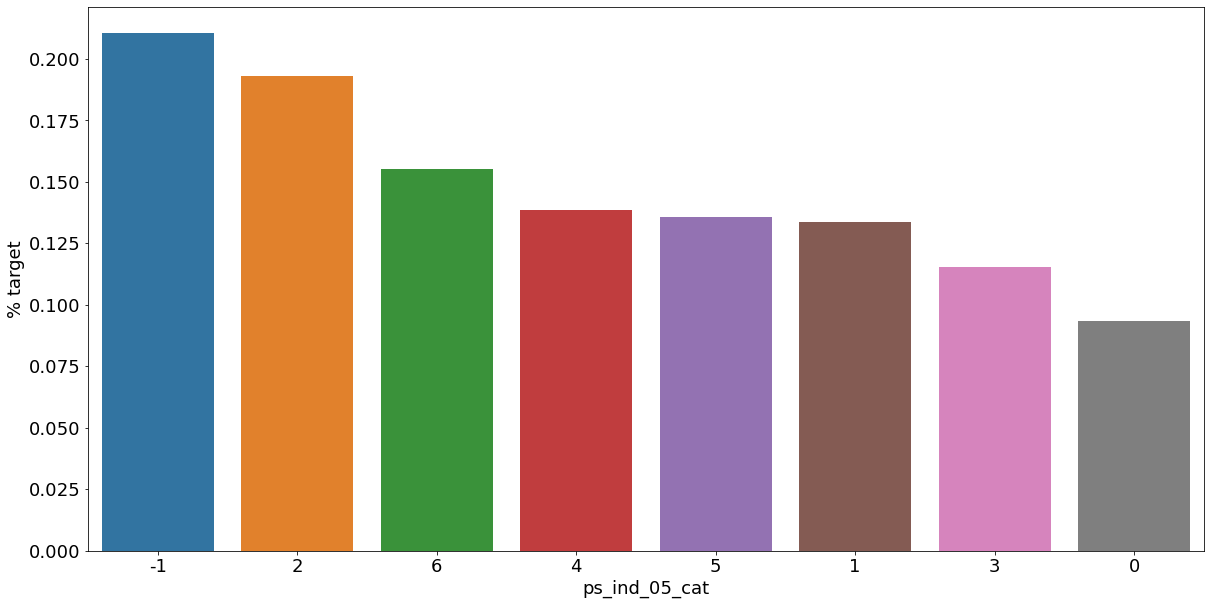

<Figure size 432x288 with 0 Axes>

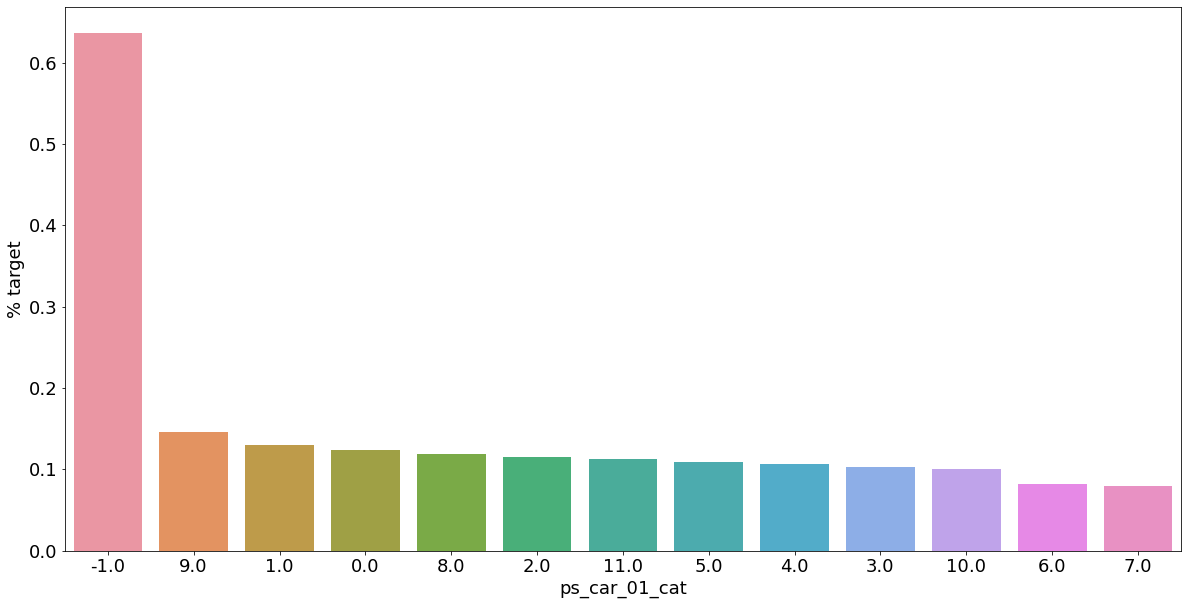

<Figure size 432x288 with 0 Axes>

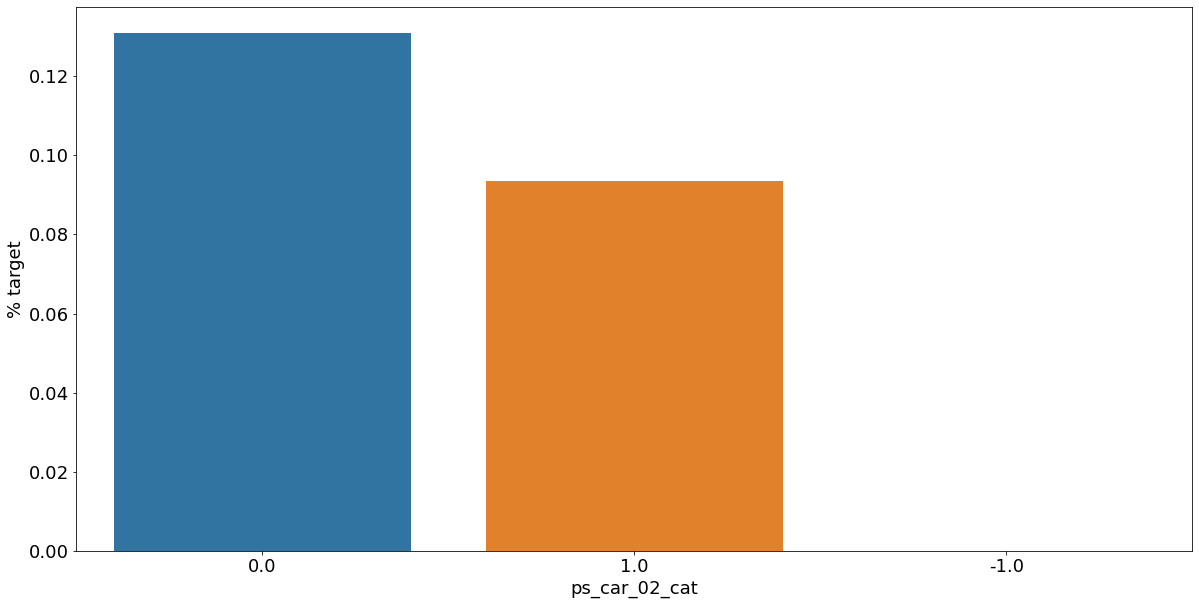

<Figure size 432x288 with 0 Axes>

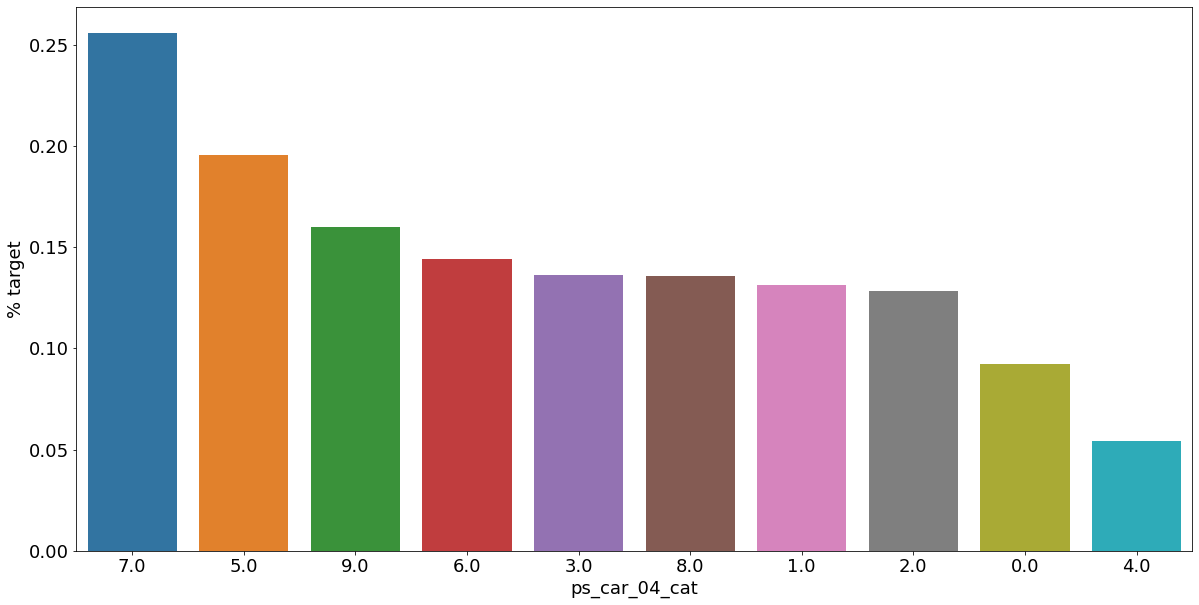

<Figure size 432x288 with 0 Axes>

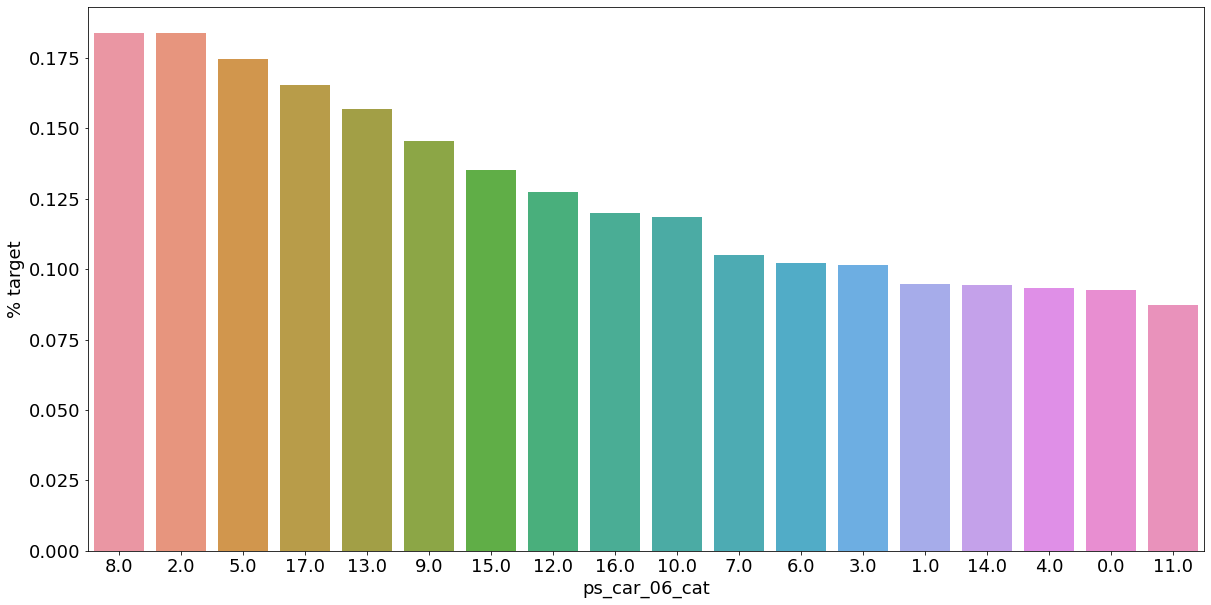

<Figure size 432x288 with 0 Axes>

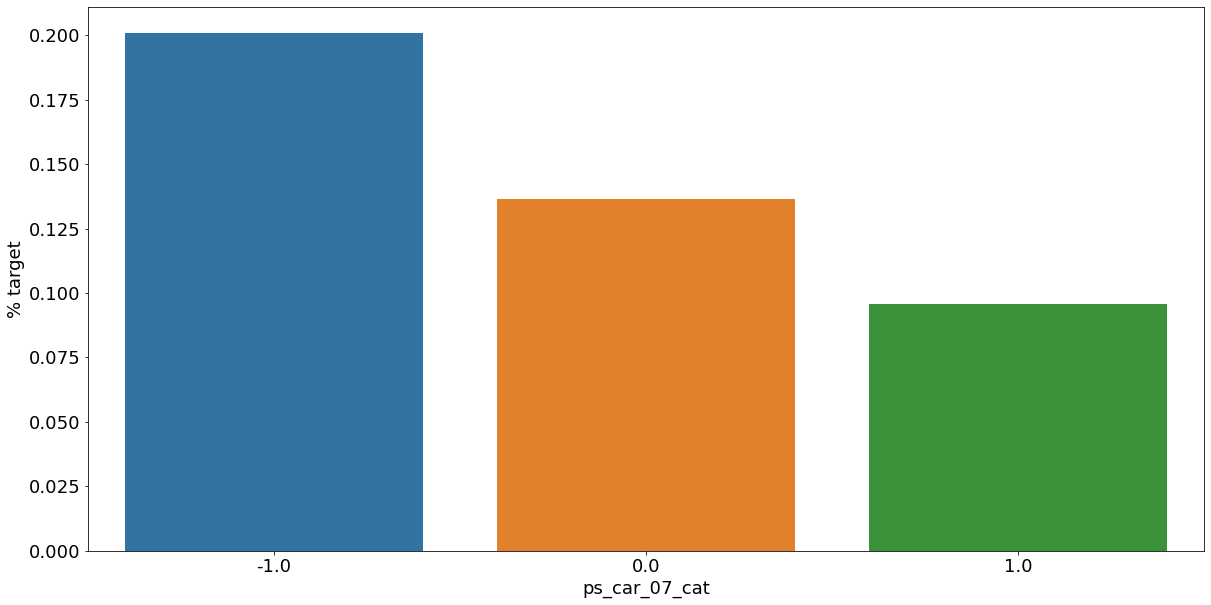

<Figure size 432x288 with 0 Axes>

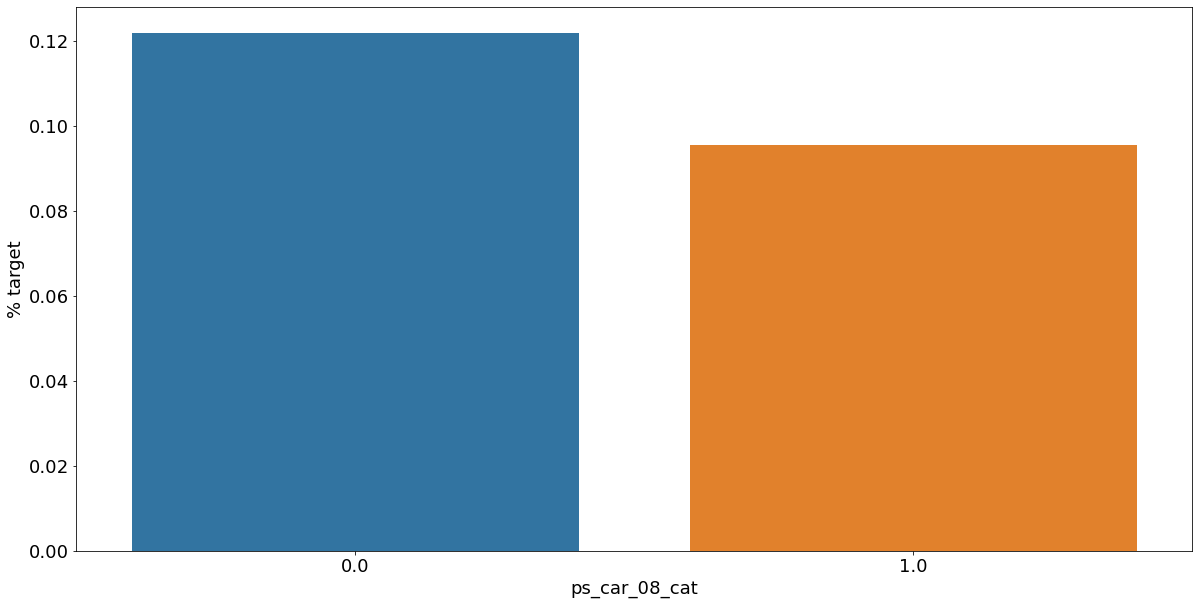

<Figure size 432x288 with 0 Axes>

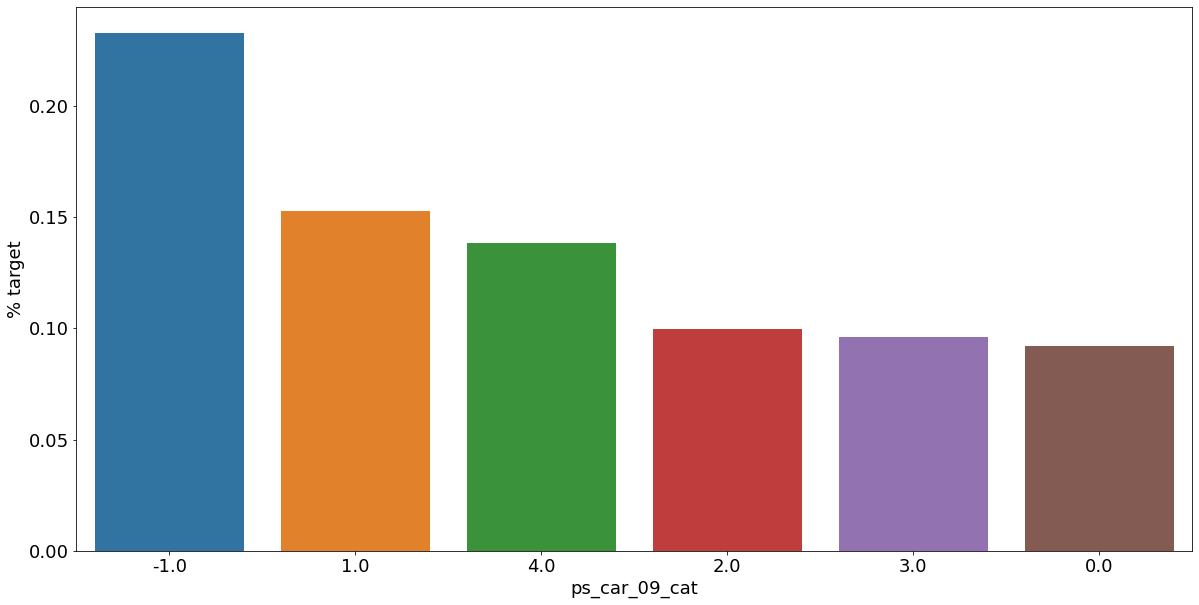

<Figure size 432x288 with 0 Axes>

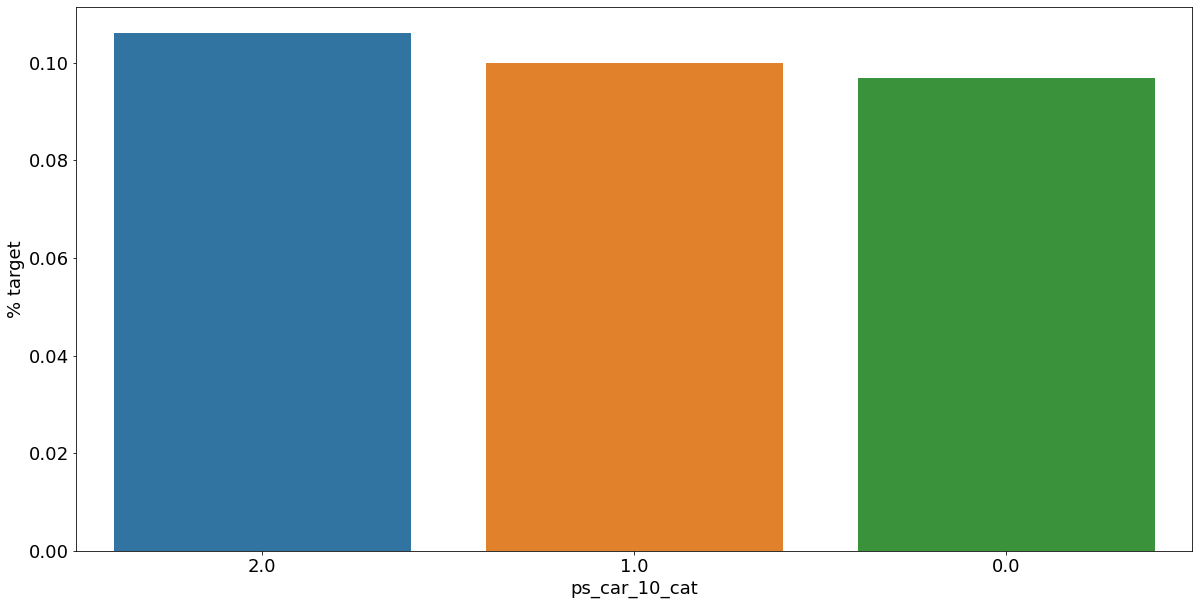

In [33]:
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize= (20, 10))

    # Calculate the percentage of target = 1 per category value
    
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by= 'target', ascending=False, inplace=True)
    
    # Bar plot
    # Order the bars descending on target mena
    sns.barplot(ax = ax, x = f, y = 'target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize = 18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis = 'both', which = 'major', labelsize= 18)
    plt.show()

As we can see from the variables **with missing valeus**, it is a good idea to keep the missing value as a separate category value, instead of replacing them by the mode for instance, The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim
<br>

결측값 변수를 통해 알 수 있듯이 결측값을 최빈값로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋습니다. 결측값을 가진 고객이 보험 청구를 요청할 확률이 훨씬 더 높은(경우에 따라 훨씬 낮은) 것으로 보입니다.

### Interval variables

Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables.

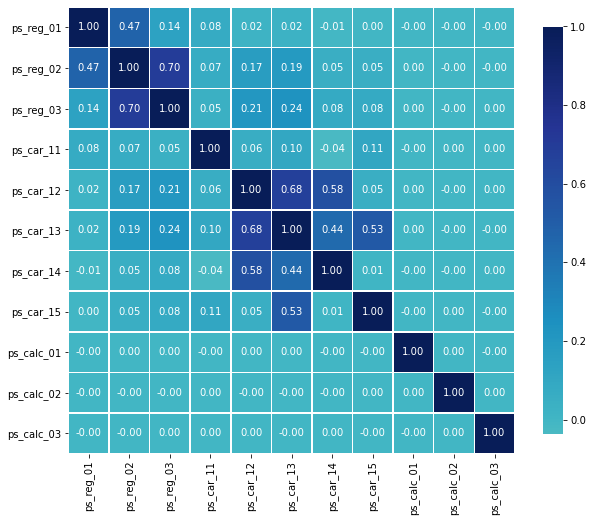

In [34]:
def corr_heatmap(v):
    correations = train[v].corr()
    
    # Create color map ranging between two colors
    cmap = 'YlGnBu'
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square = True, linewidths=.5, annot=True, cbar_kws={'shrink' : .75})
    plt.show()
    
    
v = meta[(meta.level == 'interval') & (meta.keep)].index

corr_heatmap(v)

There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car_13 (0.68)
- ps_car_12 and ps_car_14 (0.58)
- ps_car_13 and ps_car_15 (0.53)

seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a pairplot to visualize the relationshp between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables seperately.

In [35]:
s = train.sample(frac=0.1)  ## 10% sample만 가져옴

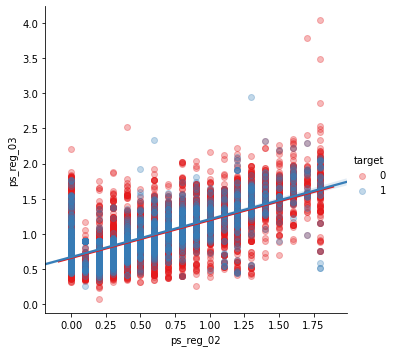

In [36]:
sns.lmplot(x = 'ps_reg_02', y='ps_reg_03', data =s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

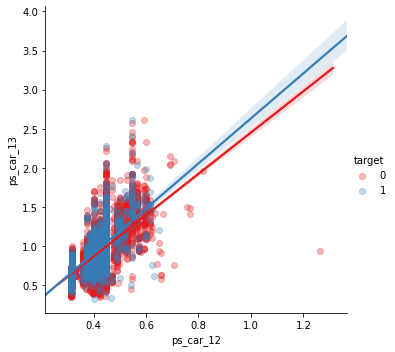

In [37]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

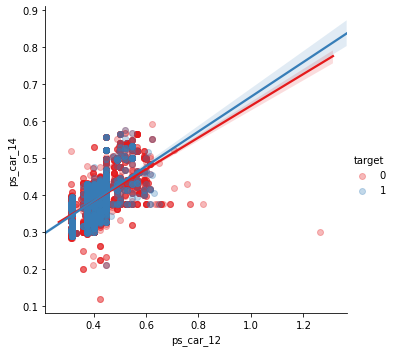

In [38]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

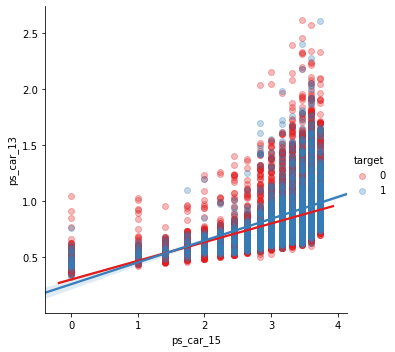

In [39]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

Arights, so now what? How can we decide which of the correlated variables to keep? We could perform PCA on the variabels to reduce the dimensions. But as the number of correlated variables is rather low, we will the model do the heavy-lifting.

### Checking the correlations between ordinal variables

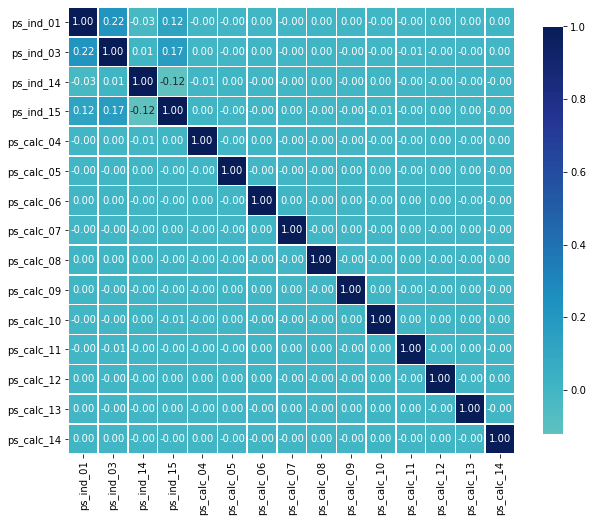

In [40]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

For the ordinal variables we do not see many correlations. We could, on the other hand, look at how the distributions are when grouping by the target value

# Feature engineering

### Creating dummy variables

The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1.Therefore we can create dummy variables to deal with that. We drop the first dummy variable as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [41]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


In [42]:
train.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0.0,ps_car_02_cat_1.0,ps_car_04_cat_1.0,ps_car_04_cat_2.0,ps_car_04_cat_3.0,ps_car_04_cat_4.0,ps_car_04_cat_5.0,ps_car_04_cat_6.0,ps_car_04_cat_7.0,ps_car_04_cat_8.0,ps_car_04_cat_9.0,ps_car_06_cat_1.0,ps_car_06_cat_2.0,ps_car_06_cat_3.0,ps_car_06_cat_4.0,ps_car_06_cat_5.0,ps_car_06_cat_6.0,ps_car_06_cat_7.0,ps_car_06_cat_8.0,ps_car_06_cat_9.0,ps_car_06_cat_10.0,ps_car_06_cat_11.0,ps_car_06_cat_12.0,ps_car_06_cat_13.0,ps_car_06_cat_14.0,ps_car_06_cat_15.0,ps_car_06_cat_16.0,ps_car_06_cat_17.0,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_1.0,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_1.0,ps_car_10_cat_2.0
0,843241,0,3,7,0,0,0,1,0,0,0,0,0,11,1,0,0,0.9,0.2,0.876784,1.0,0.316228,0.585466,0.361525,2.645751,0.3,0.1,0.3,0.0,1.0,1.0,0.0,0.0,0.0,2,1,9,3,9,2,9,6,0,1,14,0.067543,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
1,1267864,0,6,3,0,1,0,0,0,0,0,0,0,7,0,1,0,0.7,0.8,1.198958,2.0,0.316228,0.764885,0.366742,3.464102,0.0,0.2,0.9,0.0,0.0,1.0,1.0,1.0,0.0,3,1,9,3,9,4,15,6,1,5,4,0.084977,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
2,91059,0,0,7,1,0,0,0,0,0,0,0,0,5,0,0,0,0.2,0.3,0.897923,2.0,0.489898,0.891222,0.494975,3.000000,0.9,0.9,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0,2,10,5,10,3,8,2,2,2,8,0.103378,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
3,1093883,0,7,6,0,0,0,1,0,0,0,0,0,7,0,0,1,0.0,0.0,0.897923,3.0,0.374166,1.014086,0.382099,3.464102,0.1,0.3,0.6,0.0,0.0,0.0,1.0,1.0,0.0,3,1,9,4,11,2,8,9,1,1,10,0.109921,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
4,1036827,0,5,8,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.4,0.866747,1.0,0.315278,0.416573,0.359166,0.000000,0.4,0.8,0.5,0.0,1.0,0.0,0.0,0.0,1.0,2,1,9,6,10,1,11,8,2,5,9,0.080036,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0


so, creating dummy variable adds 52 variables to the training set.

### Creating interaction variables


In [43]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns ( ex. ps_reg_01, ps_reg_02, .. ) 1dimensions
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 175 variables in train


In [44]:
train.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_11,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_11^2,ps_car_11 ps_car_12,ps_car_11 ps_car_13,ps_car_11 ps_car_14,ps_car_11 ps_car_15,ps_car_11 ps_calc_01,ps_car_11 ps_calc_02,ps_car_11 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,843241,0,3,7,0,0,0,1,0,0,0,0,0,11,1,0,0,0.9,0.2,0.876784,1.0,0.316228,0.585466,0.361525,2.645751,0.3,0.1,0.3,0.0,1.0,1.0,0.0,0.0,0.0,2,1,9,3,9,2,9,6,0,1,14,0.067543,1,0,0,0,...,0.072305,0.529150,0.06,0.02,0.06,0.768750,0.876784,0.277263,0.513327,0.316979,2.319752,0.263035,0.087678,0.263035,1.0,0.316228,0.585466,0.361525,2.645751,0.3,0.1,0.3,0.1000,0.185141,0.114324,0.836660,0.094868,0.031623,0.094868,0.342770,0.211660,1.548997,0.175640,0.058547,0.175640,0.1307,0.956504,0.108457,0.036152,0.108457,7.0,0.793725,0.264575,0.793725,0.09,0.03,0.09,0.01,0.03,0.09
1,1267864,0,6,3,0,1,0,0,0,0,0,0,0,7,0,1,0,0.7,0.8,1.198958,2.0,0.316228,0.764885,0.366742,3.464102,0.0,0.2,0.9,0.0,0.0,1.0,1.0,1.0,0.0,3,1,9,3,9,4,15,6,1,5,4,0.084977,1,0,0,0,...,0.293394,2.771281,0.00,0.16,0.72,1.437500,2.397916,0.379144,0.917065,0.439709,4.153312,0.000000,0.239792,1.079062,4.0,0.632456,1.529771,0.733485,6.928203,0.0,0.4,1.8,0.1000,0.241878,0.115974,1.095445,0.000000,0.063246,0.284605,0.585050,0.280516,2.649641,0.000000,0.152977,0.688397,0.1345,1.270433,0.000000,0.073348,0.330068,12.0,0.000000,0.692820,3.117691,0.00,0.00,0.00,0.04,0.18,0.81
2,91059,0,0,7,1,0,0,0,0,0,0,0,0,5,0,0,0,0.2,0.3,0.897923,2.0,0.489898,0.891222,0.494975,3.000000,0.9,0.9,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0,2,10,5,10,3,8,2,2,2,8,0.103378,1,0,0,0,...,0.148492,0.900000,0.27,0.27,0.03,0.806266,1.795846,0.439891,0.800249,0.444449,2.693769,0.808131,0.808131,0.089792,4.0,0.979796,1.782444,0.989949,6.000000,1.8,1.8,0.2,0.2400,0.436608,0.242487,1.469694,0.440908,0.440908,0.048990,0.794277,0.441132,2.673666,0.802100,0.802100,0.089122,0.2450,1.484924,0.445477,0.445477,0.049497,9.0,2.700000,2.700000,0.300000,0.81,0.81,0.09,0.81,0.09,0.01
3,1093883,0,7,6,0,0,0,1,0,0,0,0,0,7,0,0,1,0.0,0.0,0.897923,3.0,0.374166,1.014086,0.382099,3.464102,0.1,0.3,0.6,0.0,0.0,0.0,1.0,1.0,0.0,3,1,9,4,11,2,8,9,1,1,10,0.109921,1,0,0,0,...,0.000000,0.000000,0.00,0.00,0.00,0.806266,2.693769,0.335972,0.910571,0.343096,3.110497,0.089792,0.269377,0.538754,9.0,1.122497,3.042259,1.146298,10.392305,0.3,0.9,1.8,0.1400,0.379436,0.142969,1.296148,0.037417,0.112250,0.224499,1.028371,0.387482,3.512898,0.101409,0.304226,0.608452,0.1460,1.323631,0.038210,0.114630,0.229260,12.0,0.346410,1.039230,2.078461,0.01,0.03,0.06,0.09,0.18,0.36
4,1036827,0,5,8,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.4,0.866747,1.0,0.315278,0.416573,0.359166,0.000000,0.4,0.8,0.5,0.0,1.0,0.0,0.0,0.0,1.0,2,1,9,6,10,1,11,8,2,5,9,0.080036,0

# Feature selection

### Removing features with low or zero variance

Personally, I prefer to let the classifier algorithm chose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: VarianceThreshold. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [45]:
selector = VarianceThreshold(threshold=0.01)
selector.fit_transform(train.drop(['id', 'target'], axis = 1)) # Fit to train without id , target variables

f = np.vectorize(lambda x : not x) # function to toggle boolean array element

v = train.drop(['id', 'target'], axis = 1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format('len(v)'))
print('These variables are {}'.format(list(v)))

len(v) variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0.0', 'ps_car_01_cat_1.0', 'ps_car_01_cat_2.0', 'ps_car_04_cat_3.0', 'ps_car_04_cat_4.0', 'ps_car_04_cat_5.0', 'ps_car_04_cat_6.0', 'ps_car_04_cat_7.0', 'ps_car_06_cat_2.0', 'ps_car_06_cat_5.0', 'ps_car_06_cat_8.0', 'ps_car_06_cat_12.0', 'ps_car_06_cat_16.0', 'ps_car_06_cat_17.0', 'ps_car_09_cat_4.0', 'ps_car_10_cat_1.0', 'ps_car_10_cat_2.0', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


We would lose rather many variables if we would select based on variance. But because we do not have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.

### Selecting features with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

In [46]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.019689
 2) ps_car_13                      0.015707
 3) ps_car_12 ps_car_13            0.015694
 4) ps_car_13^2                    0.015656
 5) ps_reg_03 ps_car_13            0.015646
 6) ps_car_13 ps_car_14            0.015638
 7) ps_reg_01 ps_car_13            0.015560
 8) ps_car_13 ps_car_15            0.015348
 9) ps_reg_03 ps_car_14            0.014880
10) ps_car_11 ps_car_13            0.014465
11) ps_reg_03 ps_car_12            0.014412
12) ps_reg_03 ps_car_15            0.013838
13) ps_car_14 ps_car_15            0.013591
14) ps_car_13 ps_calc_01           0.013581
15) ps_reg_01 ps_reg_03            0.013518
16) ps_car_13 ps_calc_03           0.013494
17) ps_car_13 ps_calc_02           0.013474
18) ps_reg_02 ps_car_13            0.013427
19) ps_reg_01 ps_car_14            0.013116
20) ps_reg_03                      0.013061
21) ps_reg_03 ps_car_11            0.013005
22) ps_reg_03^2                    0.012957
23) ps_calc_10                  

In [47]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 173
Number of features after selection: 87


In [48]:
train = train[selected_vars + ['target']]

# Feature scaling

As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [49]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[ 0.54776108,  0.95284236,  1.05026215, ..., -1.02360991,
        -0.86126004, -0.72618385],
       [ 2.05829264, -0.52449461, -0.07710528, ..., -0.91171115,
        -0.11243399,  1.95476962],
       [-0.96277047,  0.95284236, -0.640789  , ...,  1.9603571 ,
        -0.56172962, -1.02406756],
       ...,
       [ 0.04425057,  0.21417387,  0.7684203 , ..., -1.02360991,
        -0.96110351, -1.02406756],
       [-0.45925995,  0.58350811, -0.640789  , ..., -1.02360991,
        -0.71149483,  0.2791737 ],
       [-0.45925995,  0.58350811, -1.48631457, ...,  0.76677029,
         2.13404417,  1.95476962]])